# Model Development
관련된 데이터, 많은 데이터, 그에 맞는 모델이 중요

# 1. Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## (Simple) Linear Regression (=SLR) - Scikit-learn
One predictor/independent variable(X) & One target/response/dependent variable(Y)

y = ax + b 
* Parameter) a : slope, weight, coefficient / b : intercept, bias  -->  data fitting으로 얻어짐
* Noise) fitted line에서 벗어난 정도, 보통 0일 확률이 가장 높음

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Linear regression model 만들기
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 변수 설정
X = df[['highway-mpg']]
Y = df[['price']]
# Fit the linear model with data
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# 예측해보기
Yhat = lm.predict(X)
Yhat[0:5]          # .head() 기능 없음

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [8]:
# 실제값과 대조
df.loc[0:4,'price']

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [9]:
# Intercept b 구하기
lm.intercept_

array([38423.30585816])

In [10]:
# Slope a (coefficient) 구하기
lm.coef_
# lm : yhat = -821.73 * x + 38423.31

array([[-821.73337832]])

## Multiple Linear Regression (MLR)
Multiple independent variables

y = b + a1x1 + a2x2 + ... + anxn

In [11]:
# same with simple linear model
lm1 = LinearRegression()

In [12]:
# 4개의 변수 도입 (price와 관계있던 변수)
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]

In [13]:
# model fitting
lm1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# intercept, coefficient 구하기
lm1.intercept_, lm1.coef_
# lm1 : price = -15806 + 53*(horsepower) + 5*(curb-weight) + 82*(engine-size) + 36*(highway-mpg)

(array([-15806.62462633]),
 array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]]))

# Model Evaluation using Visualization

In [15]:
import seaborn as sns
%matplotlib inline

## 1) Visualization of Simplie Linear Regression
## Regression Plot - seaborn
Simple linear regression 시각화에 좋음

얻어지는 fitted line이 linear regression model과 같음

(14.094578853046595, 50)

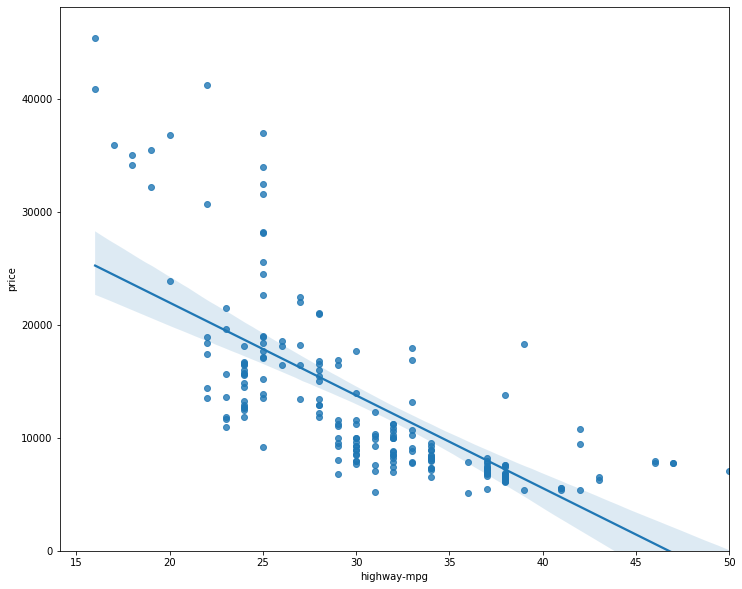

In [16]:
# figure design - plotting 보다 먼저 나와야 적용됨!
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)     # price가 0이하가 될수 없으므로 범위 자름
plt.xlim(right=50)

(0, 47414.10667770421)

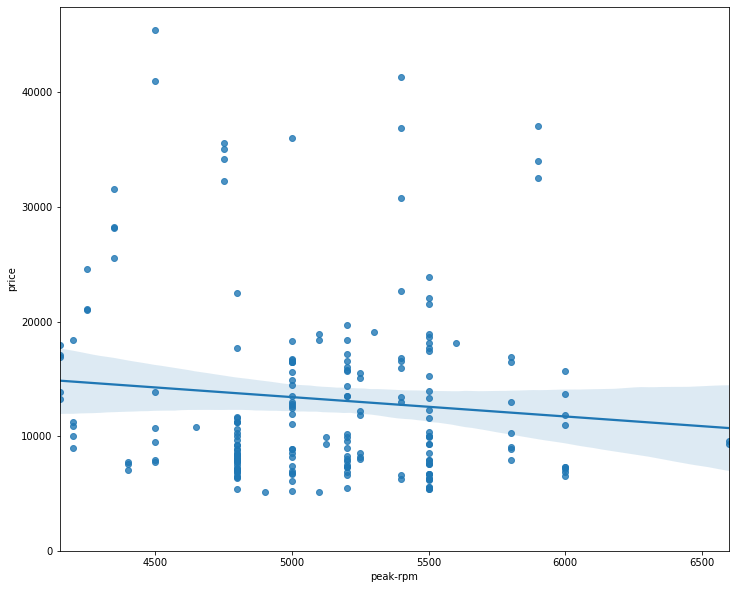

In [17]:
# peak-rpm로 해보고 그래프 비교해보기
plt.figure(figsize=(width, height))
sns.regplot('peak-rpm', 'price', data=df)
plt.ylim(bottom=0)

In [18]:
# 실제 correlation 정도 수치로 비교하기
df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


## Residual Plot - seaborn
(Actual value) - (Predicted value)를 plotting 한 그래프 - variance를 확인하기 쉬움!
* x축 : predictor variable
* y축 : residual

--> x축(y=0) 기준으로 위아래로 고르게 퍼져있으면(+_similar variance), linear model이 적합하다고 할 수 있음(<b>linear model is  good fit for the data</b>)!

--> 고르게 퍼져있지 않거나, curvature(곡선)이 생기면 non-linear model이 추천됨

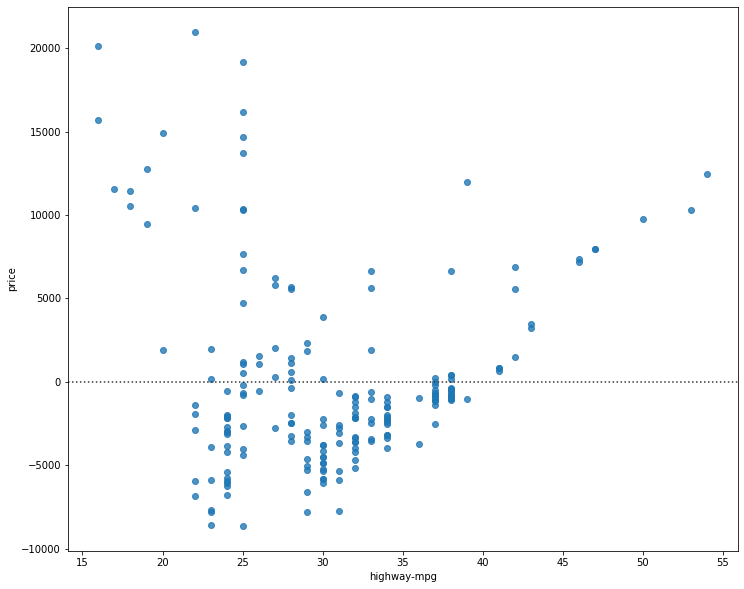

In [19]:
# residual plot
width=12
height=10
plt.figure(figsize=(width, height))
sns.residplot(df[['highway-mpg']], df[['price']])   # residual이지 price가 아니기 때문에 y>0 지정할 필요 X
plt.show()

<결론> regression plot에서 peak-rpm보다 highway-mpg가 더 line에 더 가까이 퍼져있어서 적합해 보였지만, residual plot으로부터 highway-mpg도 linear model이 적합하지 않은 것으로 판단됨

## 2) Visualization of Multiple Linear Regression - Distribution Plot
하나의 변수에 대한 관찰값 범위를 histogram이나 확률분포로 나타낸 것(<b>predictor variable 고려 안함!</b>)  -->  예를 들어 price는 다변수에 의해 관찰된 값이기 때문에 multiple variables를 가질 수록 정확해짐!

In [20]:
# 위에서 한 MLR 가져옴
lm1 = LinearRegression()
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]
lm1.fit(x, y)
yhat = lm1.predict(x)
yhat[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

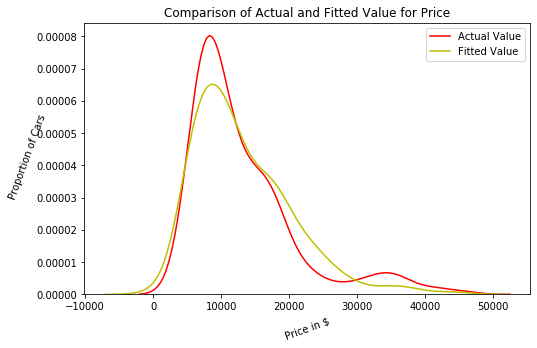

In [21]:
# distribution plot
plt.figure(figsize=(8, 5))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
ax2 = sns.distplot(yhat, hist=False, color='y', label="Fitted Value", ax=ax1)

plt.title('Comparison of Actual and Fitted Value for Price')
plt.xlabel('Price in $', rotation=20)
plt.ylabel('Proportion of Cars', rotation=70)

plt.show()
plt.close()

<결론> 상당히 유사한 결과가 얻어졌지만 아직 더 개선될 가능성이 있음 -->  non-linear 방법으로 넘어가보기!

# 2. Polynomial Regression - numpy
General linear regression의 special case (<b>non-linear</b>) - Linear regression이 정확하지 않는 경우 고려  -->  Curvilinear relationship에서 유용함
* Quadratic-2nd order : y = b + a1x1 + a2x1^2
* Cubic-3rd order : y = b + a1x1 + a2x1^2 + a3x1^3
* Higher order : y = b + a1x1 + a2x1^2 + ... + anx1^n

<색깔 참고>
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white

In [22]:
# Data plotting을 위한 function 정의
def PlotPolly(model, independent_variable, dependent_variable, Name) :
   # 예측값 설정
#     x_new = np.linspace(15, 55, 100)    # 15~55까지 99조각으로 나눔
    y_new = model(independent_variable)
    
    # line graph & Marker plot
    # 아래 plot argument 중 line 속성을 지정하는 format=[marker][line][color]
    # 실제값은 dot marker로, 예측값은 기본 line으로 설정
    plt.plot(independent_variable, dependent_variable, '*r', independent_variable, y_new, ':b')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Highway-mpg')
    ax = plt.gca()    # Get the Current Axes
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()   # Get the Current Figure
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [23]:
# 변수 설정 - 1차원으로 설정해야
x = df['highway-mpg']   
y = df['price']

In [24]:
# fit the model (cubic-3rd order)
f = np.polyfit(x, y, 3)  # x^3, x^2, x, intercept 순으로 반환함
p = np.poly1d(f)     
print(p)       # 공식으로 바꿔줌! print 꼭 붙여야 함

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


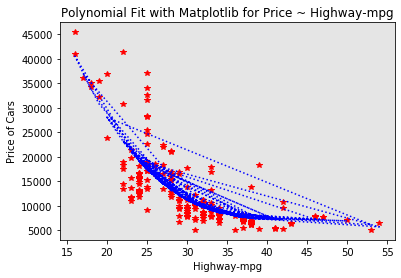

In [25]:
# 정의한 PlotPolly를 이용해서 그래프 그리기
PlotPolly(p, x, y, 'Highway-mpg')

<결론> linear model 보다 더 정확한 것을 볼 수 있다. 3차 이상으로 degree를 높일수록 더 정확해지는 것을 확인할 수 있다.

## Polynomial Regression with Multi-demension - scikit-learn
x1, x2,... multivariable이 들어간 고차 방정식  -->  numpy로는 계산 안됨!

Dimension이 커질수록, 각 variable을 standardization하는 것이 필요  -->  skikit-learn의 preprocessing 이용!

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# StandardScaler 사용해보기 - feature(컬럼)별로 정규화
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
scaler = StandardScaler()   # 아래 순서 맞춰서 진행해야 함!
scaler.fit(x)
scaler.mean_
scaler.transform(x)         # fit_transform(x)로 한번에 가능

NameError: name 'df' is not defined

In [2]:
# 2nd order인 polynomial regression 모델 만들기 
pr = PolynomialFeatures(degree=2)   # 변수 개수는 지정 안함
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
pr_t = pr.fit_transform(x)     # 변수 개수에 맞게 fit, transformation 한번에
pr_t.shape         # 계수가 구해지는 것이 아니라 [x1, x2]의 [1, x1, x2, x1^2, x1x2, x2^2]가 얻어짐 

NameError: name 'df' is not defined

<b><중요></b> y = p + bx1 + cx2 + dx1^2 + ex1x2 + fx2^2의 polynomial regression에서 실제 [x1, x2] 값에 대한 [1, x1, x2, x1^2, x1x2, x2^2] 값을 안다면, y = k + bx1 + cx2 + dx3 + ex4 + fx5의 multiple linear regression의 식에 대입하는 것과 같음!! 
    
다만, [1, a, b, a^2, ab, b^2]에서 1을 버리고<b> (include_bias=False)</b> linear regression에 대입하면 됨!

In [5]:
# Polynomial regression의 fit, transformation 따로 해보기
fit = pr.fit(x)   # 4개 변수 인식
trs = pr.transform(x)
trs.shape         # fit_transform과 같은 결과

NameError: name 'x' is not defined

In [29]:
# x -> pr_t으로 transformation 이후 형태변화
x.shape, pr_t.shape      # 열마다 별개의 결과를 만들어냄 --> 총 201개 생성

((201, 4), (201, 15))

## Pipeline - Scikit-learn
Standardization(Z-score 변환) & Polynomial transformation & Linear regression을 더 쉽게 할 수 있음

In [6]:
from sklearn.pipeline import Pipeline

In [32]:
# Pipeline은 list of tuple로 만들어짐 - bias 포함 안하도록 설정 
Input = [('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [33]:
pl = Pipeline(Input)
pl

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [34]:
# 각 단계를 fit and transform한다
pl.fit(x, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [35]:
# 예측하기
y_pl = pl.predict(x)
y_pl[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [36]:
# 예측값을 실제 데이터와 비교
y[0:4]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
Name: price, dtype: float64

# 3. Measures for In-sample Evaluation
시각화가 아닌 숫자로 모델을 평가하는 법

## Mean Squared Error (MSE) - scikit-learn
* 공식) MSE = (실제값 - 예측값)^2 / 개수

In [37]:
from sklearn.metrics import mean_squared_error

## R-squared ; Coefficient of Determination - scikit-learn
* 공식) R^2 = 1 - (MSE of regression line)/(MSE of the average of the data)  -->  보통 0~1 사이, (-)이면 overfitting 때문

    ==> <b> R^2는 클수록 좋고, 0.1이상이면 괜찮음! </b>
* 의미 : 실제 data가 얼마나 regression line에 가까운가?
      "Target variable의 R^2%의 variance가 해당 simple linear regression으로 설명된다"

In [41]:
# 1. Simple Linear Regression의 R^2 - score
lm.fit(df[['highway-mpg']], df[['price']])
lm.score(df[['highway-mpg']], df[['price']])   # fit해야 구해짐
# 49.6% of variation of price는 해당 simple linear model로 설명이 된다.

r2_score(y, lm.predict(df[['highway-mpg']]))  # 아래서 배울 식으로도 구해짐

0.4965911884339176

In [ ]:
# 2. SLR의 MSE 
yhat = lm.predict(df[['highway-mpg']])
mse = mean_squared_error(df['price'], yhat)
print('Mean squared error of real price and predicted value is:', mse)

In [ ]:
# 3. MLR의 R^2
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(x, df[['price']])
lm.score(x, df[['price']])

r2_score(y, lm.predict(x))

In [ ]:
# 4. MLR의 MSE
y_ml = lm.predict(x)
mse = mean_squared_error(df['price'], y_ml)
mse

In [43]:
# 5. Polynomial의 R^2
from sklearn.metrics import r2_score
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)    # 계수 구해짐
p = np.poly1d(f)           # 3차식 모델로 만듦
r2 = r2_score(y, p(x))

In [ ]:
# 6. Polynomial의 MSE
mean_squared_error(y, p(x))

In [46]:
# 7. Multivariate Polynomial Regression의 R^2
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
r2 = r2_score(y, pl.predict(x))
# 또는 linear regression이라는 점을 이용
lm1.fit(pr_t, y)
lm1.score(pr_t, y)

0.8463341969864728

In [ ]:
# 8. Mutivariate Polynomial Regression
mse = mean_squared_error(y, pl.predict(x))
mse

# Prediction and Decision Making
## Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# 만들어진 모델로 예측할 값
new_input = np.arange(1, 100, 1).reshape(-1, 1)
new_input

In [ ]:
x = df[['highway-mpg']]
y = df[['price']]
lm.fit(x, y)
lm

In [ ]:
# 아예 새로운 x값을 넣어서 y를 구함
yhat = lm.predict(new_input)
yhat[0:5]

In [ ]:
# 예측하는 그래프를 그리기
plt.plot(new_input, yhat, '-.')
plt.show()

## Decision Making : Determining a Good Model Fit
R_squred 값이 크고, MSE 값이 작게 나오는 model이 better fit for the data

<b>Simple Linear Regression</b> : Using Highway-mpg as a Predictor Variable of Price.
* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

<b>Multiple Linear Regression</b> : Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

<b>Polynomial Regression</b> : Using Highway-mpg as a Predictor Variable of Price.
* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

<b>Multivariate Polynomial Regression</b> : Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
* R-squared: 0.8463341969864728
* MSE: 9.7 x 10^6 

<b>1) Simple Linear Regression vs Multiple Linear Regression</b>

MSE가 작고 R squared가 큰 MLR가 더 적합한 모델

highway-mpg 하나보다 다른 variable을 추가할 때 더 정확하게 예측함

<b>2) SLR vs Polynomial Regression</b>
    
MSE가 작고 R squared가 큰 Polynomial Fit이 더 적합한 모델

highway-mpg 한 변수 기준으로는, SLR보다 polynomial이 더 정확하게 예측함

<b>3) MLR vs Polynomial Regression</b>
    
MSE가 작고 R squared가 큰 MLR이 더 적합한 모델

highway-mpg 기준으로 polynomial을 만드는 것보다 다른 variable을 추가하는 것이 더 정확하게 예측함

<b><결론> MLR이 가장 적합한 모델, 그러나 multivariate polynomial까지 고려하면 후자가 가장 적합함!</b>
